<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/densenet121_%26_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

from keras.applications.vgg19 import VGG19,preprocess_input
from keras.applications.xception import Xception,preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.resnet50 import ResNet50
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Flatten

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [ ]:
!apt-get install tree
!mkdir TRAIN TEST VAL TRAIN/NORMAL TRAIN/PNEUMONIA TEST/NORMAL TEST/PNEUMONIA VAL/NORMAL VAL/PNEUMONIA
!tree -d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (91.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
.
├── drive
│   ├── MyDrive
│   │   ├── AIID
│   │   ├── Colab Notebooks
│   │   │   ├── Home Identification
│   │   │   │   └── dataset
│   │   │   │       ├── home1
│   │   │   │       ├── home2
│   │   │   │       ├── home3
│   │   │   │       ├── home4
│   │   │   │       ├─

In [ ]:
img_p = '/content/drive/MyDrive/AdaptiveHist/'
#train/val/test split
for CLASS in os.listdir(img_p):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(img_p + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(img_p + CLASS)):
            img = img_p + CLASS + '/' + FILE_NAME
            if n < 300:
                shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*IMG_NUM:
                shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/TRAIN'
valid_path = '/content/VAL' 
test_path = '/content/TEST'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
  
  # useful for getting number of classes
folders = glob('/content/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)


58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Found 4084 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/100
128/128 [==============================] - 109s 679ms/step - loss: 0.2319 - accuracy: 0.9114 - val_loss: 0.2135 - val_accuracy: 0.9239
Epoch 2/100
128/128 [==============================] - 70s 546ms/step - loss: 0.1428 - accuracy: 0.9452 - val_loss: 0.1577 - val_accuracy: 0.9479
Epoch 3/100
128/128 [==============================] - 69s 540ms/step - loss: 0.1209 - accuracy: 0.9537 - val_loss: 0.1632 - val_accuracy: 0.9453
Epoch 4/100
128/128 [==============================] - 70s 543ms/step - loss: 0.1128 - accuracy: 0.9559 - val_loss: 0.1359 - val_accuracy: 0.9530
Epoch 5/100
128/128 [==============================] - 69s 541ms/step - loss: 0.0972 - accuracy: 0.9677 - val_loss: 0.1766 - val_accuracy: 0.9350
Epoch 6/100
128/128 [==============================] - 69s 539ms/step - loss: 0.1007 - accuracy: 0.9574 - val_loss: 0.1358 - val_accuracy: 0.955

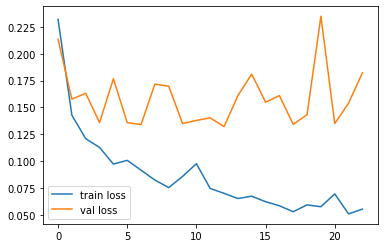

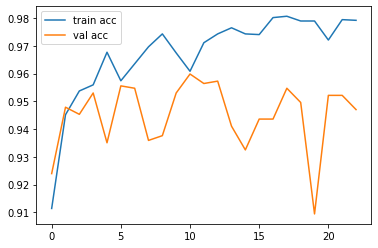

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('/content/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


es     = EarlyStopping(monitor = 'val_loss', mode = 'min',patience = 10)

#hist = model.fit(training_set, batch_size = 32, epochs = 100, shuffle = True,
                 #validation_data = validation_set,callbacks = [es], verbose = 1)

'''r= model.fit(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000
                         )'''
len(training_set)
len(validation_set)

time.sleep(0.1)
# fit the model
'''r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)'''
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=100,
  shuffle = True,
  callbacks = [es],
  verbose = 1
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('vgg16.h5')

In [ ]:
test_accu = model.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%')

19/19 [==============================] - 16s 868ms/step - loss: 0.3510 - accuracy: 0.9050
The testing accuracy is : 90.49999713897705 %


In [ ]:
  #True and predicted value calculation
class_labels = list(test_set.class_indices.keys())
predictions = []
true        = []
ctr         = 0
for batch, label in test_set:
    prediction = model.predict(batch).argmax(axis = -1)
    predictions.extend(prediction)
    true.extend(label.argmax(axis = -1))
    ctr += len(prediction)
    if ctr >= len(test_set.labels):
        break

#Defining function for confusion matrix plot     
matrix     = confusion_matrix(true,predictions)
print(matrix)



[[243  57]
 [  0 300]]


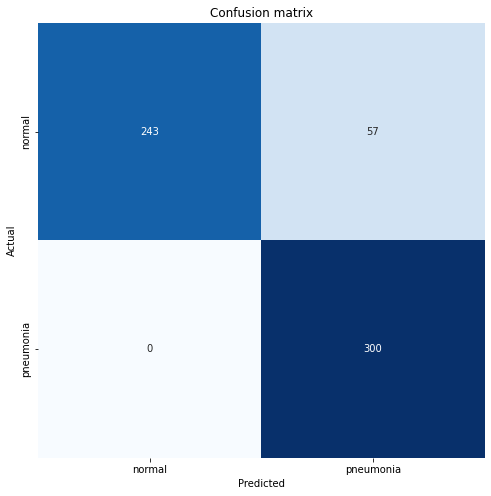

In [ ]:
classnames = ['normal', 'pneumonia']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
test_accu = model.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%')



19/19 [==============================] - 5s 286ms/step - loss: 0.3510 - accuracy: 0.9050
The testing accuracy is : 90.49999713897705 %


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
m=precision_score(true, predictions)

In [ ]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(true, predictions)))

print('Precision: {:.4f}'.format(precision_score(true, predictions)))
print('Recall: {:.4f}'.format(recall_score(true, predictions)))
print('F1-score: {:.4f}\n'.format(f1_score(true, predictions)))

print('\nClassification Report:\n')
print(classification_report(true, predictions, target_names = ['Normal', 'Pneumonia']))


Accuracy: 0.9050

Precision: 0.8403
Recall: 1.0000
F1-score: 0.9132


Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      0.81      0.90       300
   Pneumonia       0.84      1.00      0.91       300

    accuracy                           0.91       600
   macro avg       0.92      0.91      0.90       600
weighted avg       0.92      0.91      0.90       600



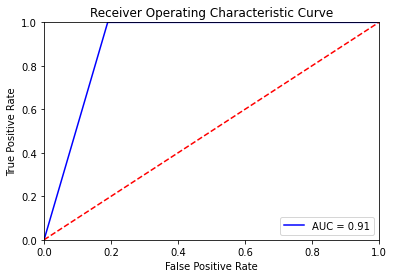

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(true, np.round(predictions))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(true, predictions).ravel()
specificity = tn / (tn+fp)
print('specificity: {:.4f}'.format(specificity))

specificity: 0.8100


In [ ]:

from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet201
# add preprocessing layer to the front of VGG
densenet201 =  DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

# don't train existing weights
for layer in densenet201.layers:
  layer.trainable = False
  
  
  # useful for getting number of classes
folders = glob('/content/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(densenet201.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model_dense = Model(inputs=densenet201.input, outputs=prediction)

# view the structure of the model
model_dense.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# tell the model what cost and optimization method to use
model_dense.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)


74850304/74836368 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

Found 4084 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/100
128/128 [==============================] - 108s 719ms/step - loss: 0.3553 - accuracy: 0.9192 - val_loss: 0.3364 - val_accuracy: 0.9128
Epoch 2/100
128/128 [==============================] - 81s 635ms/step - loss: 0.2322 - accuracy: 0.9442 - val_loss: 0.2487 - val_accuracy: 0.9470
Epoch 3/100
128/128 [==============================] - 81s 634ms/step - loss: 0.1947 - accuracy: 0.9547 - val_loss: 0.2243 - val_accuracy: 0.9513
Epoch 4/100
128/128 [==============================] - 81s 631ms/step - loss: 0.1762 - accuracy: 0.9589 - val_loss: 0.4832 - val_accuracy: 0.9239
Epoch 5/100
128/128 [==============================] - 81s 630ms/step - loss: 0.1456 - accuracy: 0.9650 - val_loss: 0.2685 - val_accuracy: 0.9530
Epoch 6/100
128/128 [==============================] - 81s 633ms/step - loss: 0.1294 - accuracy: 0.9706 - val_loss: 0.2482 - val_accuracy: 0.953

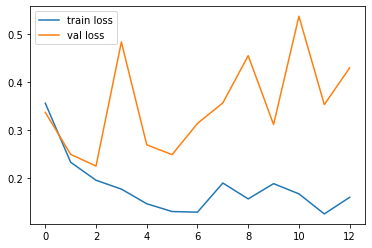

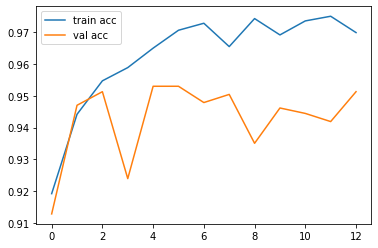

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('/content/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


es     = EarlyStopping(monitor = 'val_loss', mode = 'min',patience = 10)

#hist = model_dense.fit(training_set, batch_size = 32, epochs = 100, shuffle = True,
                 #validation_data = validation_set,callbacks = [es], verbose = 1)

'''r= model.fit(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000
                         )'''
len(training_set)
len(validation_set)

time.sleep(0.1)
# fit the model
'''r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)'''
r = model_dense.fit(
  training_set,
  validation_data=validation_set,
  epochs=100,
  shuffle = True,
  callbacks = [es],
  verbose = 1
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model_dense.save('densenet201.h5')

In [ ]:
test_accu = model_dense.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%')



19/19 [==============================] - 2s 94ms/step - loss: 0.5930 - accuracy: 0.9517
The testing accuracy is : 95.16666531562805 %


In [ ]:
  #True and predicted value calculation
class_labels = list(test_set.class_indices.keys())
predictions = []
true        = []
ctr         = 0
for batch, label in test_set:
    prediction = model_dense.predict(batch).argmax(axis = -1)
    predictions.extend(prediction)
    true.extend(label.argmax(axis = -1))
    ctr += len(prediction)
    if ctr >= len(test_set.labels):
        break

#Defining function for confusion matrix plot     
matrix  = confusion_matrix(true,predictions)
print(matrix)



[[282  18]
 [ 11 289]]


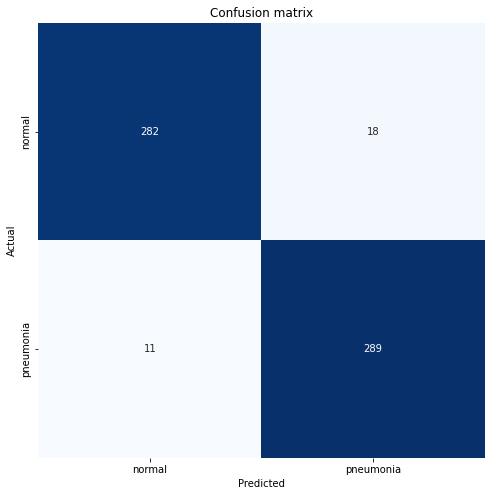

In [ ]:
classnames = ['normal', 'pneumonia']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(true, predictions)))

print('Precision: {:.4f}'.format(precision_score(true, predictions)))
print('Recall: {:.4f}'.format(recall_score(true, predictions)))
print('F1-score: {:.4f}\n'.format(f1_score(true, predictions)))
tn, fp, fn, tp = confusion_matrix(true, predictions).ravel()
specificity = tn / (tn+fp)
print('specificity: {:.4f}'.format(specificity))

print('\nClassification Report:\n')
print(classification_report(true, predictions, target_names = ['Normal', 'Pneumonia']))


Accuracy: 0.9517

Precision: 0.9414
Recall: 0.9633
F1-score: 0.9522

specificity: 0.9400

Classification Report:

              precision    recall  f1-score   support

      Normal       0.96      0.94      0.95       300
   Pneumonia       0.94      0.96      0.95       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



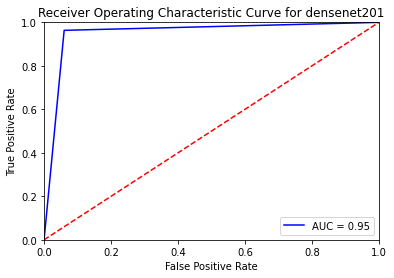

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(true, np.round(predictions))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Curve for densenet201')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.legend(["densenet201"], loc ="upper right")
plt.show()

In [ ]:
# add preprocessing layer to the front of VGG
densenet121 =  DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

# don't train existing weights
for layer in densenet121.layers:
  layer.trainable = False
  
  
  # useful for getting number of classes
folders = glob('/content/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(densenet121.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model1 = Model(inputs=densenet121.input, outputs=prediction)

# view the structure of the model
model1.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# tell the model what cost and optimization method to use
model1.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                           

Found 4086 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/100
128/128 [==============================] - 56s 383ms/step - loss: 0.5423 - accuracy: 0.8950 - val_loss: 0.2867 - val_accuracy: 0.9487
Epoch 2/100
128/128 [==============================] - 46s 356ms/step - loss: 0.2496 - accuracy: 0.9359 - val_loss: 0.4348 - val_accuracy: 0.8915
Epoch 3/100
128/128 [==============================] - 45s 352ms/step - loss: 0.2229 - accuracy: 0.9503 - val_loss: 0.4520 - val_accuracy: 0.9068
Epoch 4/100
128/128 [==============================] - 45s 351ms/step - loss: 0.2220 - accuracy: 0.9530 - val_loss: 0.3685 - val_accuracy: 0.9239
Epoch 5/100
128/128 [==============================] - 45s 351ms/step - loss: 0.1898 - accuracy: 0.9581 - val_loss: 0.2688 - val_accuracy: 0.9444
Epoch 6/100
128/128 [==============================] - 45s 353ms/step - loss: 0.1400 - accuracy: 0.9655 - val_loss: 0.2334 - val_accuracy: 0.9538

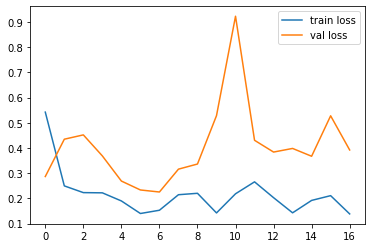

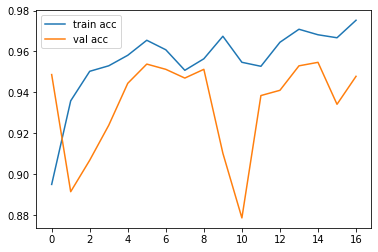

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('/content/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


es     = EarlyStopping(monitor = 'val_loss', mode = 'min',patience = 10)

len(training_set)
len(validation_set)

time.sleep(0.1)
# fit the model
'''r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)'''
r = model1.fit(
  training_set,
  validation_data=validation_set,
  epochs=100,
  shuffle = True,
  callbacks = [es],
  verbose = 1
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model1.save('densenet121.h5')

In [ ]:
test_accu = model1.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%')

19/19 [==============================] - 1s 64ms/step - loss: 0.5274 - accuracy: 0.9400
The testing accuracy is : 93.99999976158142 %


In [ ]:
  #True and predicted value calculation
class_labels = list(test_set.class_indices.keys())
predictions = []
true        = []
ctr         = 0
for batch, label in test_set:
    prediction = model1.predict(batch).argmax(axis = -1)
    predictions.extend(prediction)
    true.extend(label.argmax(axis = -1))
    ctr += len(prediction)
    if ctr >= len(test_set.labels):
        break

#Defining function for confusion matrix plot     
matrix  = confusion_matrix(true,predictions)
print(matrix)



[[271  29]
 [  7 293]]


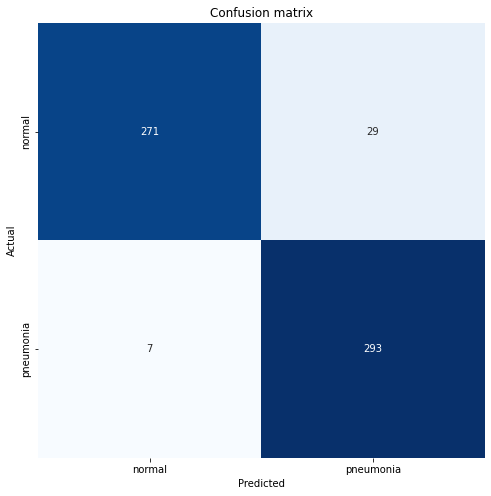

In [ ]:
classnames = ['normal', 'pneumonia']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(true, predictions)))

print('Precision: {:.4f}'.format(precision_score(true, predictions)))
print('Recall: {:.4f}'.format(recall_score(true, predictions)))
print('F1-score: {:.4f}\n'.format(f1_score(true, predictions)))
tn, fp, fn, tp = confusion_matrix(true, predictions).ravel()
specificity = tn / (tn+fp)
print('specificity: {:.4f}'.format(specificity))

print('\nClassification Report:\n')
print(classification_report(true, predictions, target_names = ['Normal', 'Pneumonia']))


Accuracy: 0.9400

Precision: 0.9099
Recall: 0.9767
F1-score: 0.9421

specificity: 0.9033

Classification Report:

              precision    recall  f1-score   support

      Normal       0.97      0.90      0.94       300
   Pneumonia       0.91      0.98      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



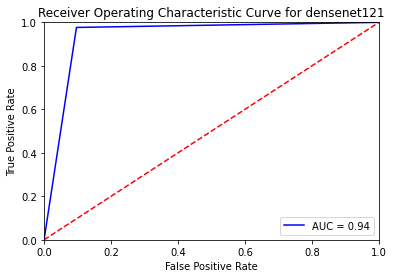

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(true, np.round(predictions))
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Curve for densenet121')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.legend(["densenet201"], loc ="upper right")
plt.show()

In [ ]:
from keras.applications.xception import Xception,preprocess_input
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/TRAIN'
valid_path = '/content/VAL' 
test_path = '/content/TEST'

# add preprocessing layer to the front of VGG
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in xception.layers:
  layer.trainable = False
  
  
  # useful for getting number of classes
folders = glob('/content/TRAIN/*')
  
# our layers - you can add more if you want
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
X_model = Model(inputs=xception.input, outputs=prediction)

# view the structure of the model
X_model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# tell the model what cost and optimization method to use
X_model.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)



83697664/83683744 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                    

Found 4086 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/100
128/128 [==============================] - 51s 371ms/step - loss: 0.4760 - accuracy: 0.9050 - val_loss: 0.4297 - val_accuracy: 0.9145
Epoch 2/100
128/128 [==============================] - 46s 360ms/step - loss: 0.3459 - accuracy: 0.9266 - val_loss: 0.3950 - val_accuracy: 0.9333
Epoch 3/100
128/128 [==============================] - 46s 356ms/step - loss: 0.3564 - accuracy: 0.9356 - val_loss: 0.5966 - val_accuracy: 0.8957
Epoch 4/100
128/128 [==============================] - 46s 357ms/step - loss: 0.2531 - accuracy: 0.9486 - val_loss: 1.1744 - val_accuracy: 0.7957
Epoch 5/100
128/128 [==============================] - 45s 354ms/step - loss: 0.2640 - accuracy: 0.9454 - val_loss: 0.4703 - val_accuracy: 0.9239
Epoch 6/100
128/128 [==============================] - 45s 349ms/step - loss: 0.2692 - accuracy: 0.9442 - val_loss: 0.5046 - val_accuracy: 0.9077

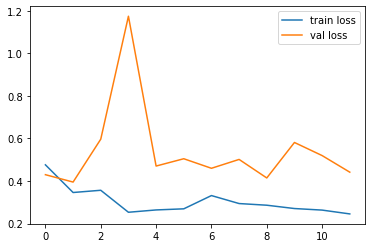

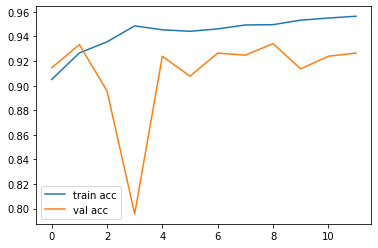

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('/content/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


es     = EarlyStopping(monitor = 'val_loss', mode = 'min',patience = 10)

#hist = model.fit(training_set, batch_size = 32, epochs = 100, shuffle = True,
                 #validation_data = validation_set,callbacks = [es], verbose = 1)

'''r= model.fit(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000
                         )'''
len(training_set)
len(validation_set)

time.sleep(0.1)

r = X_model.fit(
  training_set,
  validation_data=validation_set,
  epochs=100,
  shuffle = True,
  callbacks = [es],
  verbose = 1
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

X_model.save('XCEPTION.h5')

In [ ]:
test_accu = X_model.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%') 

19/19 [==============================] - 2s 91ms/step - loss: 0.5807 - accuracy: 0.9100
The testing accuracy is : 91.00000262260437 %


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/TRAIN'
valid_path = '/content/VAL' 
test_path = '/content/TEST'

# add preprocessing layer to the front of VGG
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False
  
  
  # useful for getting number of classes
folders = glob('/content/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg19.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model19 = Model(inputs=vgg19.input, outputs=prediction)

# view the structure of the model
model19.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# tell the model what cost and optimization method to use
model19.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)


80150528/80134624 [==============================] - 0s 0us/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Found 4086 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/100
128/128 [==============================] - 49s 375ms/step - loss: 0.2580 - accuracy: 0.8926 - val_loss: 0.1989 - val_accuracy: 0.9205
Epoch 2/100
128/128 [==============================] - 48s 371ms/step - loss: 0.1631 - accuracy: 0.9320 - val_loss: 0.2552 - val_accuracy: 0.8880
Epoch 3/100
128/128 [==============================] - 47s 368ms/step - loss: 0.1403 - accuracy: 0.9420 - val_loss: 0.2439 - val_accuracy: 0.8915
Epoch 4/100
128/128 [==============================] - 48s 374ms/step - loss: 0.1324 - accuracy: 0.9506 - val_loss: 0.1711 - val_accuracy: 0.9368
Epoch 5/100
128/128 [==============================] - 48s 372ms/step - loss: 0.1223 - accuracy: 0.9555 - val_loss: 0.3039 - val_accuracy: 0.8718
Epoch 6/100
128/128 [==============================] - 47s 368ms/step - loss: 0.1241 - accuracy: 0.9498 - val_loss: 0.1687 - val_accuracy: 0.9342

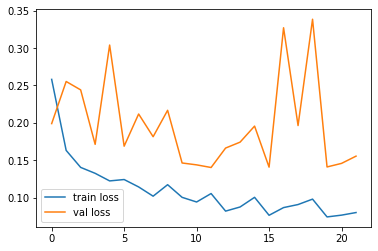

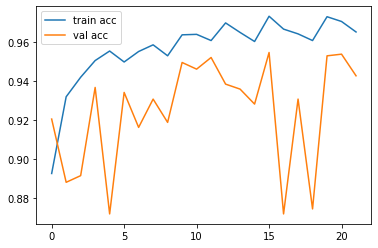

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('/content/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


es     = EarlyStopping(monitor = 'val_loss', mode = 'min',patience = 10)

#hist = model.fit(training_set, batch_size = 32, epochs = 100, shuffle = True,
                 #validation_data = validation_set,callbacks = [es], verbose = 1)

'''r= model.fit(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000
                         )'''
len(training_set)
len(validation_set)

time.sleep(0.1)
# fit the model
'''r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)'''
r = model19.fit(
  training_set,
  validation_data=validation_set,
  epochs=100,
  shuffle = True,
  callbacks = [es],
  verbose = 1
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model19.save('vgg19.h5')

In [ ]:
test_accu = model19.evaluate(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%') 

19/19 [==============================] - 2s 75ms/step - loss: 0.1708 - accuracy: 0.9350
The testing accuracy is : 93.50000023841858 %


In [ ]:
#True and predicted value calculation
class_labels = list(test_set.class_indices.keys())
predictions = []
true        = []
ctr         = 0
for batch, label in test_set:
    prediction = model19.predict(batch).argmax(axis = -1)
    predictions.extend(prediction)
    true.extend(label.argmax(axis = -1))
    ctr += len(prediction)
    if ctr >= len(test_set.labels):
        break

#Defining function for confusion matrix plot     
matrix     = confusion_matrix(true,predictions)
print(matrix)


[[276  24]
 [ 15 285]]


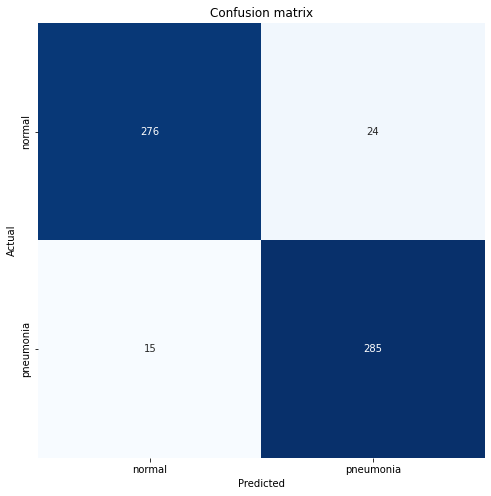

In [ ]:
classnames = ['normal', 'pneumonia']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(true, predictions)))

print('Precision: {:.4f}'.format(precision_score(true, predictions)))
print('Recall: {:.4f}'.format(recall_score(true, predictions)))
print('F1-score: {:.4f}\n'.format(f1_score(true, predictions)))

print('\nClassification Report:\n')
print(classification_report(true, predictions, target_names = ['Normal', 'Pneumonia']))


Accuracy: 0.9350

Precision: 0.9223
Recall: 0.9500
F1-score: 0.9360


Classification Report:

              precision    recall  f1-score   support

      Normal       0.95      0.92      0.93       300
   Pneumonia       0.92      0.95      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.93       600
weighted avg       0.94      0.94      0.93       600



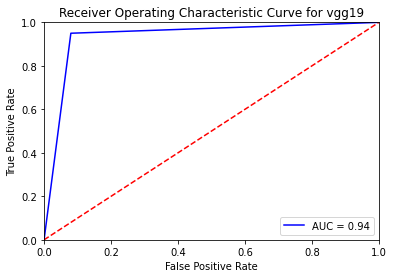

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(true, np.round(predictions))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Curve for vgg19')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.legend(["densenet201"], loc ="upper right")
plt.show()